## IT Salary Survey 

#### Brief/Backgroung about the dataset
An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany. This year 1238 respondents volunteered to participate in the survey. The data has been made publicly available by the authors.
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.

# 1.Data Understanding

## 1a) Loading Necessary Libraries

In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

## 1b) Loading the data

In [84]:
original_data=pd.read_csv('C:/Users/dell/Desktop/EDA_DataSets/archive/ITSalarySurveyEU2020.csv')
df=pd.read_csv('C:/Users/dell/Desktop/EDA_DataSets/archive/ITSalarySurveyEU2020.csv')

In [85]:
# viewing the data
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [87]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape

(1253, 23)

In [88]:
print("IT Salary Survey dataset  has {0} columns and {1} rows".format(df.shape[0],df.shape[1]));

IT Salary Survey dataset  has 1253 columns and 23 rows


In [89]:
#Printing all the columns present in data
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

## Renaming some columns
##### (Since the column names were too lengthy to proceed with)

In [90]:
df.rename(columns = {'Total years of experience': 'Years_of_experience',
                       'Years of experience in Germany':'Years_of_experience_Germany','Seniority level':'Seniority_level',
                       'Your main technology / programming language': 'Main_technology',
                     'Position': 'Position',
                      'Other technologies/programming languages you use often': 'Other_technologies',
                      'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly_salary',
                     'Yearly bonus + stocks in EUR':'Yearly_bonus_and_stocks', 'Employment status':'Employment_status',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Annual_salary_year_ago',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country':'Annual_bonus_and_stocks',
                       'Сontract duration':'Сontract_duration','Company size':'Company_size','Company type':'Company_type',
                       'Have you lost your job due to the coronavirus outbreak?':'job_lost_during_covid',
                       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'shorter_working_week_hrs',
                      'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'additional_monetary_support', 
                      'Number of vacation days': 'Vacation_Days','Main language at work': 'Language_at_work',
                      }, inplace = True)

In [91]:
# looking at the columns again (after renaming)

df.head()

,Timestamp,Age,Gender,City,Position,Years_of_experience,Years_of_experience_Germany,Seniority_level,Main_technology,Other_technologies,...,Annual_bonus_and_stocks,Vacation_Days,Employment_status,Сontract_duration,Language_at_work,Company_size,Company_type,job_lost_during_covid,shorter_working_week_hrs,additional_monetary_support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [92]:
# A closer look at the data types present in the data
df.dtypes

Timestamp                       object
Age                            float64
Gender                          object
City                            object
Position                        object
Years_of_experience             object
Years_of_experience_Germany     object
Seniority_level                 object
Main_technology                 object
Other_technologies              object
Yearly_salary                  float64
Yearly_bonus_and_stocks         object
Annual_salary_year_ago         float64
Annual_bonus_and_stocks         object
Vacation_Days                   object
Employment_status               object
Сontract_duration               object
Language_at_work                object
Company_size                    object
Company_type                    object
job_lost_during_covid           object
shorter_working_week_hrs       float64
additional_monetary_support     object
dtype: object

## 1c) Checking for Null Values

In [93]:
#checking null values
df.isnull().sum()

Timestamp                        0
Age                             27
Gender                          10
City                             0
Position                         6
Years_of_experience             16
Years_of_experience_Germany     32
Seniority_level                 12
Main_technology                127
Other_technologies             157
Yearly_salary                    0
Yearly_bonus_and_stocks        424
Annual_salary_year_ago         368
Annual_bonus_and_stocks        639
Vacation_Days                   68
Employment_status               17
Сontract_duration               29
Language_at_work                16
Company_size                    18
Company_type                    25
job_lost_during_covid           20
shorter_working_week_hrs       880
additional_monetary_support    791
dtype: int64

In [94]:
#null value in percentage
df.isnull().sum()/df.shape[0]*100

Timestamp                       0.000000
Age                             2.154828
Gender                          0.798085
City                            0.000000
Position                        0.478851
Years_of_experience             1.276935
Years_of_experience_Germany     2.553871
Seniority_level                 0.957702
Main_technology                10.135674
Other_technologies             12.529928
Yearly_salary                   0.000000
Yearly_bonus_and_stocks        33.838787
Annual_salary_year_ago         29.369513
Annual_bonus_and_stocks        50.997606
Vacation_Days                   5.426975
Employment_status               1.356744
Сontract_duration               2.314445
Language_at_work                1.276935
Company_size                    1.436552
Company_type                    1.995211
job_lost_during_covid           1.596169
shorter_working_week_hrs       70.231445
additional_monetary_support    63.128492
dtype: float64

## Plotting Histogram to check if the data is normally distributed(for numerical columns)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Yearly_salary'}>,
        <AxesSubplot:title={'center':'Annual_salary_year_ago'}>,
        <AxesSubplot:title={'center':'shorter_working_week_hrs'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

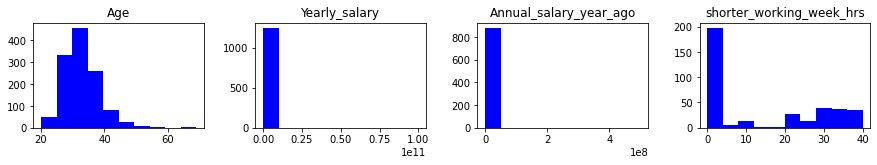

In [95]:
df.hist(layout=(5,4),color='blue',figsize=(15,12),grid=False)


### INFERENCE -
#### By looking at the garphs we can say that the data is not normally distributed for these columns.


In [99]:
#df['Age'].fillna(df['Age'].median()[0], inplace = True)
#df['Age'] = df['Age'].astype('int')

## 1d) Missing Value Treatment

### For Numerical Variables
#### We will use median to impute the missing values for the numerical columns since the data is not normally distributed.

### For Categorical Variables

In [ ]:
#df['Gender']=df['Gender'].fillna(df['Gender'].mode())
#df['Years_of_experience']=df['Years_of_experience'].fillna(df['Years_of_experience'].mode())
#df['Years_of_experience_Germany']=df['Years_of_experience_Germany'].fillna(df['Years_of_experience_Germany'].mode())
#df['Seniority_level']=df['Seniority_level'].fillna(df['Seniority_level'].mode())
#df['Main_technology']=df['Main_technology'].fillna(df['Main_technology'].mode())
#df['Other_technologies']=df['Other_technologies'].fillna(df['Other_technologies'].mode())
#df['Yearly_bonus_and_stocks']=df['Yearly_bonus_and_stocks'].fillna(df['Yearly_bonus_and_stocks'].mode())
#df['Annual_salary_year_ago']=df['Annual_salary_year_ago'].fillna(df['Annual_salary_year_ago'].mode())
#df['Annual_bonus_and_stocks']=df['Annual_bonus_and_stocks'].fillna(df['Annual_bonus_and_stocks'].mode())
#df['Vacation_Days']=df['Vacation_Days'].fillna(df['Vacation_Days'].mode())
#df['Employment_status']=df['Employment_status'].fillna(df['Employment_status'].mode())
#df['Сontract_duration']=df['Сontract_duration'].fillna(df['Сontract_duration'].mode())
#df['Language_at_work']=df['Language_at_work'].fillna(df['Language_at_work'].mode())
#df['Language_at_work']=df['Language_at_work'].fillna(df['Language_at_work'].mode())
#df['Company_size']=df['Company_size'].fillna(df['Company_size'].mode())
#df['Company_type']=df['Company_type'].fillna(df['Company_type'].mode())
#df['job_lost_during_covid']=df['job_lost_during_covid'].fillna(df['job_lost_during_covid'].mode())
#df['shorter_working_week_hrs']=df['shorter_working_week_hrs'].fillna(df['shorter_working_week_hrs'].mode())
#df['additional_monetary_support']=df['additional_monetary_support'].fillna(df['additional_monetary_support'].mode())

In [ ]:
#df['Other_technologies'].fillna(value='missing')

In [ ]:
#(df.isnull().sum()/df.shape[0])*100

In [96]:
df['Vacation_Days'] = pd.to_numeric(df['Vacation_Days'], errors = 'coerce').fillna(0).astype(int)
df['Years_of_experience'] = pd.to_numeric(df['Years_of_experience'], errors = 'coerce').fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly_salary'] = df['Yearly_salary'].astype(int)

In [97]:
#unique elements in each attribute
df.nunique()

Timestamp                      1248
Age                              41
Gender                            3
City                            119
Position                        148
Years_of_experience              34
Years_of_experience_Germany      53
Seniority_level                  24
Main_technology                 256
Other_technologies              562
Yearly_salary                   201
Yearly_bonus_and_stocks         168
Annual_salary_year_ago          147
Annual_bonus_and_stocks         131
Vacation_Days                    35
Employment_status                11
Сontract_duration                 3
Language_at_work                 14
Company_size                      5
Company_type                     63
job_lost_during_covid            10
shorter_working_week_hrs         23
additional_monetary_support      59
dtype: int64

## Outlier Detection

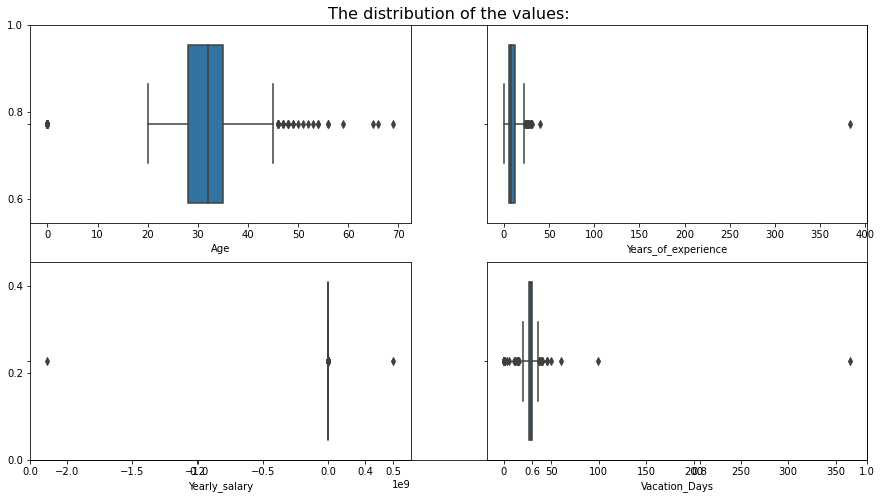

In [99]:
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = df, x = 'Age', ax = axs[0,0])
sns.boxplot(data = df, x = 'Years_of_experience',ax = axs[0,1])
sns.boxplot(data = df, x = 'Yearly_salary',ax = axs[1,0])
sns.boxplot(data = df, x = 'Vacation_Days', ax= axs[1,1])
plt.show()

#### Looking at the above graphs we can see that there are outliers in the data

### Outlier Treatment/ Removing Outliers

In [100]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] > lower_boundary) & (dataframe[column] < upper_boundary)]
    return df_new

In [101]:
# the values distribution after excluding the outliers

age = outliers(df, 'Age')
experience = outliers(df, 'Years_of_experience')
salary = outliers(df, 'Yearly_salary')
vacation = outliers(df, 'Vacation_Days')

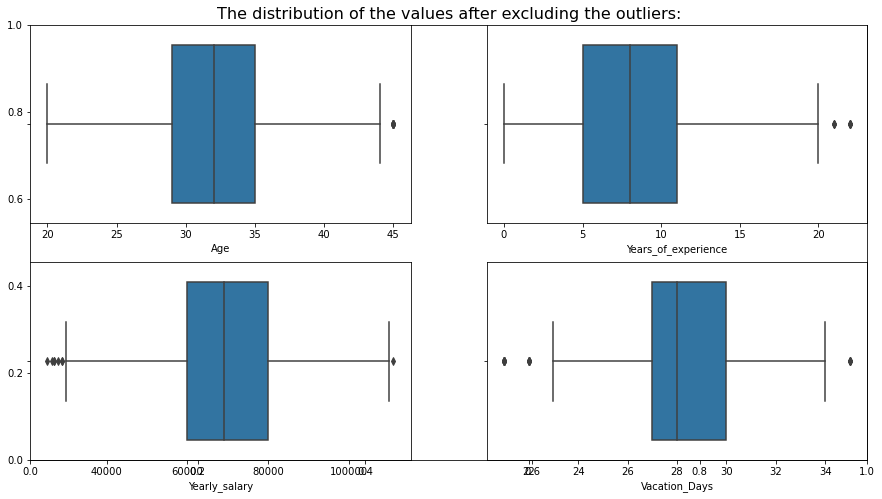

In [102]:
# the distribution of the values after excluding the outliers:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = experience, x= 'Years_of_experience',ax = axs[0,1])
sns.boxplot(data = salary, x= 'Yearly_salary',ax = axs[1,0])
sns.boxplot(data = vacation, x= 'Vacation_Days', ax= axs[1,1])
plt.show()

#### The number of outliers have been reduced (not completely removed)

## Univariate Analysis

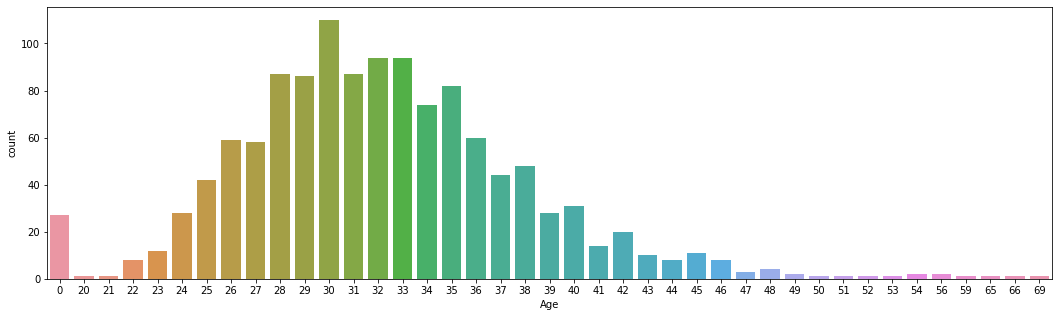

In [108]:
#Age
plt.figure(figsize=(18,5))
sns.countplot(df['Age'])
plt.show()

##### From the Age distribution we can say that majority of the IT Specialists lie in the age group of 28-33 years.

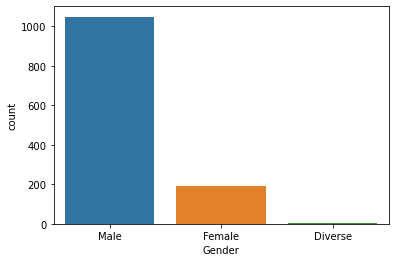

In [109]:
#Gender
sns.countplot(df['Gender'])
plt.show()

In [110]:
df['Gender'].value_counts(normalize=True)*100

Male       84.392599
Female     15.446500
Diverse     0.160901
Name: Gender, dtype: float64

#### Approximately 84% of the IT professionals are males and only 15.45% of them are females.The diverse gender is less than 1%.

In [27]:
df.groupby("Gender").mean()["Yearly_salary"]

Gender
Diverse    1.445000e+05
Female     2.662480e+06
Male       7.384706e+04
Name: Yearly_salary, dtype: float64

Text(0.5, 0, 'Count')

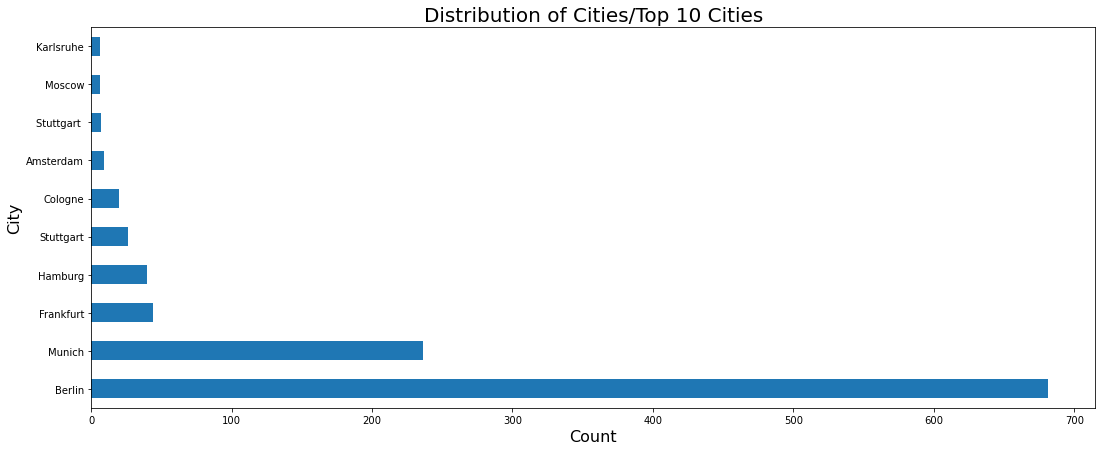

In [111]:
#Cities
plt.figure(figsize=(18,7))
df['City'].value_counts()[:10].plot(kind='barh')
plt.title("Distribution of Cities/Top 10 Cities", fontsize = 20)
plt.ylabel("City",fontsize = 16)
plt.xlabel("Count",fontsize = 16)


In [112]:
df['City'].value_counts()[:10]

Berlin        681
Munich        236
Frankfurt      44
Hamburg        40
Stuttgart      26
Cologne        20
Amsterdam       9
Stuttgart       7
Moscow          6
Karlsruhe       6
Name: City, dtype: int64

In [113]:
df['City'].value_counts(normalize=True)[:10]*100

Berlin        54.349561
Munich        18.834796
Frankfurt      3.511572
Hamburg        3.192338
Stuttgart      2.075020
Cologne        1.596169
Amsterdam      0.718276
Stuttgart      0.558659
Moscow         0.478851
Karlsruhe      0.478851
Name: City, dtype: float64

#### Approximately 54% of the IT professionals are from Berlin and about 18% from Munich

In [114]:
group1=['Years_of_experience','Yearly_salary']

In [115]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

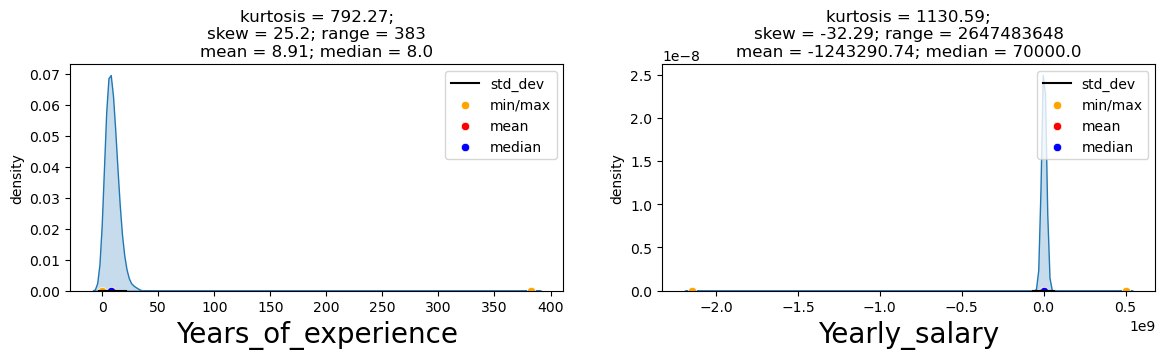

In [116]:
UVA_KDE(df,group1)

#### For years_of experience we can see that the mean experience is of 8.9 years

#### 

Text(0.5, 0, 'Seniority Level')

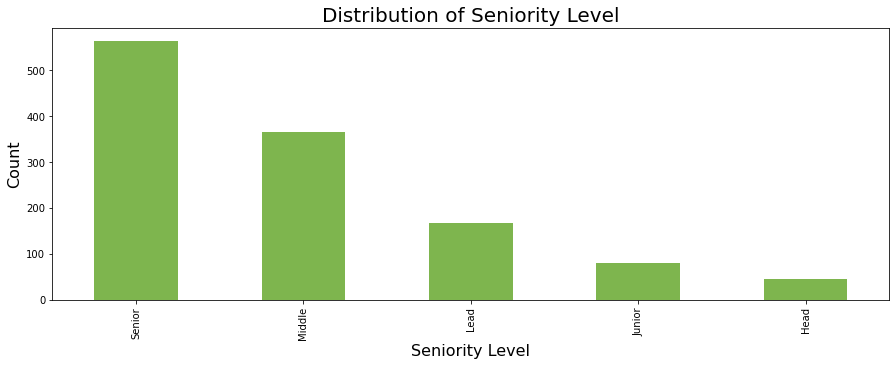

In [117]:
#Seniority_level
plt.figure(figsize=(15,5))
df['Seniority_level'].value_counts()[:5].plot(kind='bar',color='#7eb54e')
plt.title("Distribution of Seniority Level", fontsize = 20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Seniority Level",fontsize=16)

In [118]:
df['Seniority_level'].value_counts()[:5]

Senior    565
Middle    366
Lead      166
Junior     79
Head       44
Name: Seniority_level, dtype: int64

In [119]:
df['Seniority_level'].value_counts(normalize=True)[:5]*100

Senior    45.527800
Middle    29.492345
Lead      13.376309
Junior     6.365834
Head       3.545528
Name: Seniority_level, dtype: float64

#### About 45% of the professionals belong to the senior level, about 29% at the middle level of seniority and about 13% of them belong to the lead category of Seniority level.

In [120]:
df = df.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')
df = df.replace(['typescript', 'Typescript'], 'TypeScript')

Text(0.5, 0, 'Main Technology')

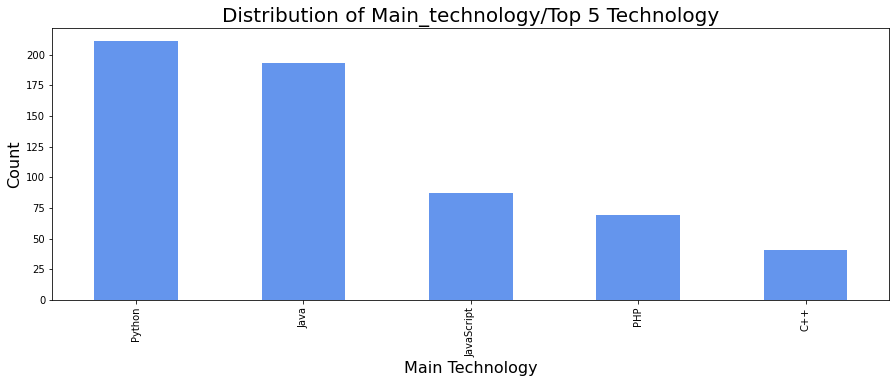

In [121]:
#Main_technology
plt.figure(figsize=(15,5))
df['Main_technology'].value_counts()[:5].plot(kind='bar',color='cornflowerblue')
plt.title("Distribution of Main_technology/Top 5 Technology",fontsize=20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Main Technology",fontsize=16)

In [122]:
df['Main_technology'].value_counts()[:5]

Python        211
Java          193
JavaScript     87
PHP            69
C++            41
Name: Main_technology, dtype: int64

In [123]:
df['Main_technology'].value_counts(normalize=True)[:10]*100

Python        18.738899
Java          17.140320
JavaScript     7.726465
PHP            6.127886
C++            3.641208
C#             2.664298
Scala          2.131439
Swift          2.131439
Go             2.042629
.NET           2.042629
Name: Main_technology, dtype: float64

#### Approximately 18% IT professionals have python as their main technology (most of the IT professionals have python as their main skill) followed by Java.

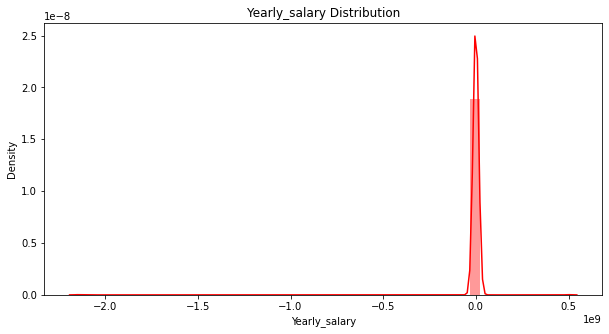

In [124]:
#Yearly Salary Distribution
plt.figure(figsize=(10,5))
sns.distplot(df["Yearly_salary"],color='r')
plt.title("Yearly_salary Distribution")
plt.show()

#### The distribution is not normal,and the data is skewed.

In [125]:
df['Yearly_salary'].value_counts()[:10]

60000     85
70000     83
65000     77
75000     73
80000     66
90000     45
85000     42
55000     35
72000     32
100000    28
Name: Yearly_salary, dtype: int64

In [126]:
df['Yearly_salary'].value_counts(normalize=True)[:10]*100

60000     6.783719
70000     6.624102
65000     6.145251
75000     5.826018
80000     5.267358
90000     3.591381
85000     3.351955
55000     2.793296
72000     2.553871
100000    2.234637
Name: Yearly_salary, dtype: float64

#### About 6.7% of the IT professionals receive an yearly salary of about 60,000 Euros.And about 2 % people also receive a salary of 100000 Euros.

Text(0.5, 0, 'Count')

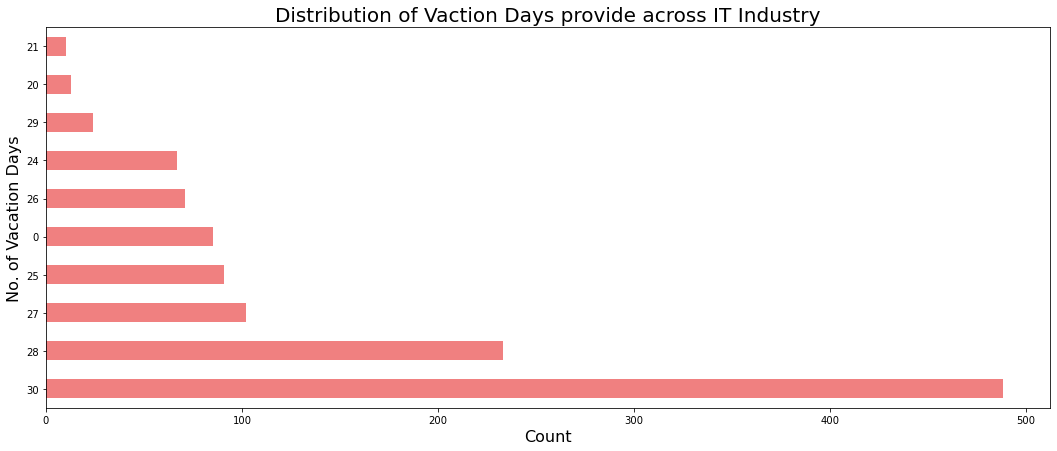

In [127]:
#Vacation Days
plt.figure(figsize=(18,7))
df['Vacation_Days'].value_counts()[:10].plot(kind='barh',color='lightcoral')
plt.title("Distribution of Vaction Days provide across IT Industry", fontsize = 20)
plt.ylabel("No. of Vacation Days",fontsize = 16)
plt.xlabel("Count",fontsize = 16)

#### Majority of the IT professionals receive 30 vacation days during the year.

In [128]:
#Employment_status

In [129]:
df['Employment_status'].value_counts()

Full-time employee                                                                 1190
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Working Student                                                                       1
Intern                                                                                1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
working student                                                                       1
Company Director                                                                      1
Werkstudent                                                                           1
Name: Employment_status, dtype: 

In [130]:
df['Employment_status'].value_counts(normalize=True)*100

Full-time employee                                                                 96.278317
Self-employed (freelancer)                                                          2.265372
Part-time employee                                                                  0.647249
Founder                                                                             0.242718
full-time, but 32 hours per week (it was my request, I'm a student)                 0.080906
Working Student                                                                     0.080906
Intern                                                                              0.080906
Full-time position, part-time position, & self-employed (freelancing, tutoring)     0.080906
working student                                                                     0.080906
Company Director                                                                    0.080906
Werkstudent                                                           

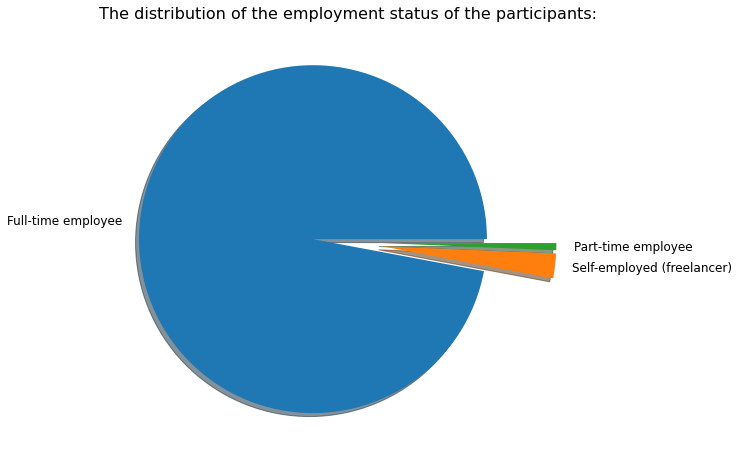

In [131]:
status = salary.loc[salary['Employment_status'].isin(['Full-time employee','Self-employed (freelancer)','Part-time employee'])]
status.shape
plt.figure(figsize= (20,8))
plt.pie(status['Employment_status'].value_counts(), labels= status['Employment_status'].value_counts().index, explode = [0.2]*3,
       textprops = {'fontsize' : 12}, shadow = True)
plt.title('The distribution of the employment status of the participants:', fontsize = 16)
plt.show()

#### About 92% of the professional are full time employees,2.2% of them are self employeed and about 0.64% of them work part time.

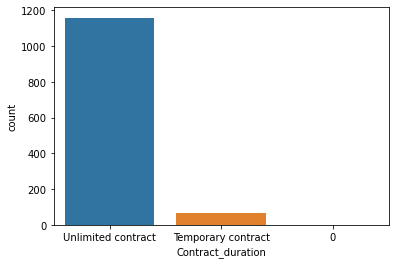

In [132]:
#Contract_Category
sns.countplot(df['Сontract_duration'])
plt.show()

In [133]:
df['Сontract_duration'].value_counts()

Unlimited contract    1159
Temporary contract      64
0                        1
Name: Сontract_duration, dtype: int64

In [134]:
df['Сontract_duration'].value_counts(normalize=True)*100

Unlimited contract    94.689542
Temporary contract     5.228758
0                      0.081699
Name: Сontract_duration, dtype: float64

#### About 94.6% of the professionals have unlimited contract while about 5% of them are on temporary contract.

Text(0.5, 0, 'Main Language')

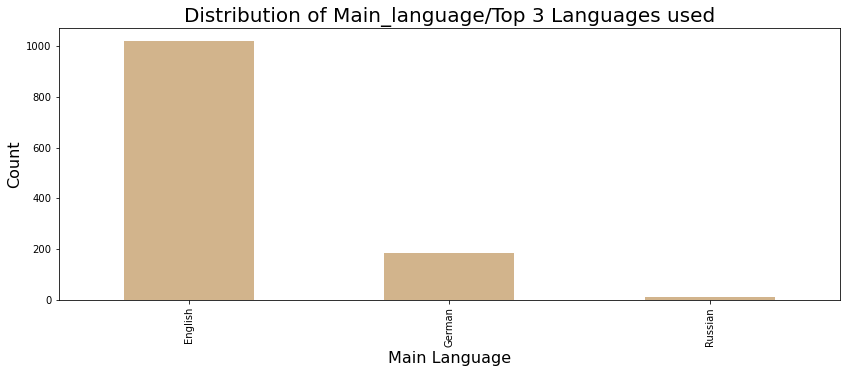

In [135]:
#Language_at_work
plt.figure(figsize=(14,5))
df['Language_at_work'].value_counts()[:3].plot(kind='bar',color='tan')
plt.title("Distribution of Main_language/Top 3 Languages used",fontsize=20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Main Language",fontsize=16)


In [136]:
df['Language_at_work'].value_counts()

English               1020
German                 186
Russian                 12
Italian                  3
Spanish                  3
Czech                    2
English and German       2
Русский                  2
Polish                   2
French                   1
Russian, English         1
50/50                    1
Deuglisch                1
both                     1
Name: Language_at_work, dtype: int64

In [137]:
df['Language_at_work'].value_counts(normalize=True)*100

English               82.457559
German                15.036378
Russian                0.970089
Italian                0.242522
Spanish                0.242522
Czech                  0.161681
English and German     0.161681
Русский                0.161681
Polish                 0.161681
French                 0.080841
Russian, English       0.080841
50/50                  0.080841
Deuglisch              0.080841
both                   0.080841
Name: Language_at_work, dtype: float64

#### About 82% of the IT professionals communicate via English language making it the most commonly used language amongst IT professionals in the region.German is the second most common language with about 15% of professionals using it.

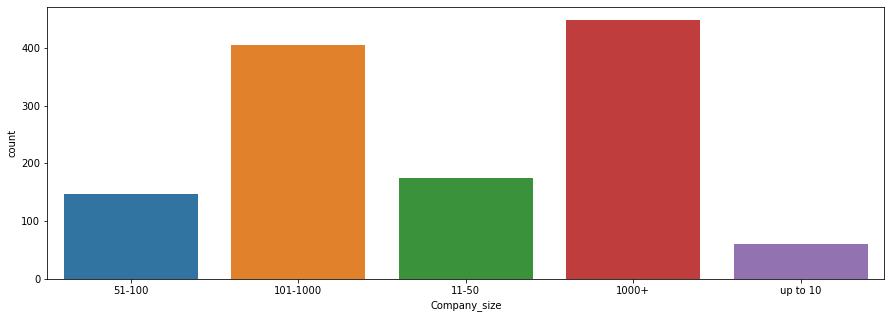

In [138]:
#Company_size
plt.figure(figsize=(15,5))
sns.countplot(df['Company_size'])
plt.show()

In [139]:
df['Company_size'].value_counts()

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company_size, dtype: int64

In [140]:
df['Company_size'].value_counts(normalize=True)*100

1000+       36.275304
101-1000    32.793522
11-50       14.089069
51-100      11.902834
up to 10     4.939271
Name: Company_size, dtype: float64

#### About 36.2% IT professionals work in companies that have an employee size of over 1000,about 32% of them work at companies having employee size between 101-1000.

Text(0.5, 0, 'Count')

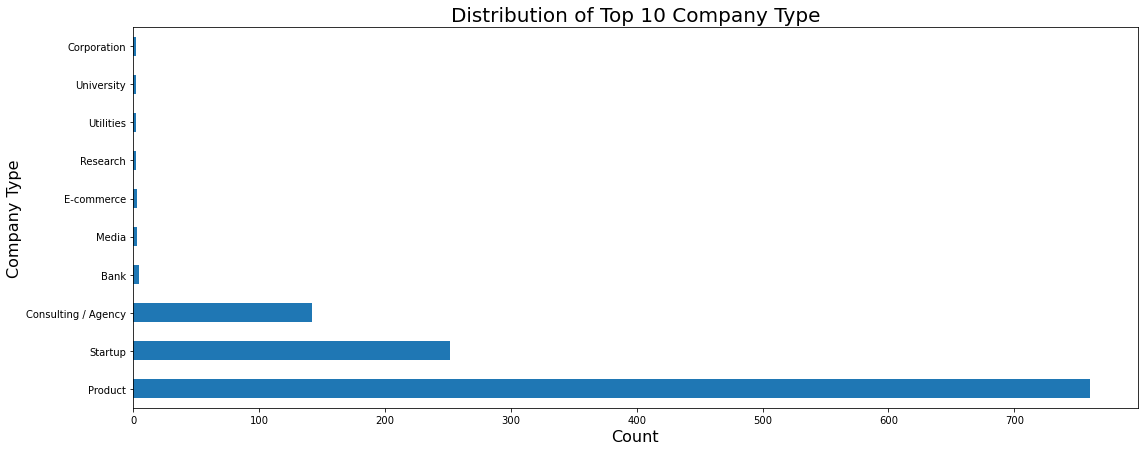

In [141]:
#Company_type
plt.figure(figsize=(18,7))
df['Company_type'].value_counts()[:10].plot(kind='barh')
plt.title("Distribution of Top 10 Company Type", fontsize = 20)
plt.ylabel("Company Type",fontsize = 16)
plt.xlabel("Count",fontsize = 16)

In [142]:
#Company_type
df['Company_type'].value_counts()[:10]

Product                760
Startup                252
Consulting / Agency    142
Bank                     5
Media                    3
E-commerce               3
Research                 2
Utilities                2
University               2
Corporation              2
Name: Company_type, dtype: int64

In [143]:
df['Company_type'].value_counts(normalize=True)[:10]*100

Product                61.889251
Startup                20.521173
Consulting / Agency    11.563518
Bank                    0.407166
Media                   0.244300
E-commerce              0.244300
Research                0.162866
Utilities               0.162866
University              0.162866
Corporation             0.162866
Name: Company_type, dtype: float64

#### Approximately 61% of the professionals work at product based companies,about 20% of them work at Startups,and about 11% of them work at Consulting companies

### Important Inferences
##### 1) From the Age distribution we can say that majority of the IT Specialists lie in the age group of 28-33 years.
#### 2)Approximately 84% of the IT professionals are males and only 15.45% of them are females.The diverse gender is less than 1%.
#### 3)Approximately 54% of the IT professionals are from Berlin and about 18% from Munich
#### 4)For years_of experience we can see that the mean experience is of 8.9 years
#### 5)About 45% of the professionals belong to the senior level, about 29% at the middle level of seniority and about 13% of them belong to the lead category of Seniority level.
#### 6)Approximately 18% IT professionals have python as their main technology (most of the IT professionals have python as their main skill) followed by Java.
#### 7)The distribution is not normal,and the data is skewed for Yearly salary
#### 8)About 6.7% of the IT professionals receive an yearly salary of about 60,000 Euros.And about 2 % people also receive a salary of 100000 Euros.
#### 9)Majority of the IT professionals receive 30 vacation days during the year.
#### 10)About 92% of the professional are full time employees,2.2% of them are self employeed and about 0.64% of them work part time.
#### 11)About 94.6% of the professionals have unlimited contract while about 5% of them are on temporary contract.
#### 12)About 82% of the IT professionals communicate via English language making it the most commonly used language amongst IT professionals in the region.German is the second most common language with about 15% of professionals using it.
#### 13)About 36.2% IT professionals work in companies that have an employee size of over 1000,about 32% of them work at companies having employee size between 101-1000.
#### 14)Approximately 61% of the professionals work at product based companies,about 20% of them work at Startups,and about 11% of them work at Consulting companies



# Bivariate Analysis

In [66]:
#unique elements in each attribute
df.nunique()

Timestamp                      1248
Age                              41
Gender                            3
City                            119
Position                        148
Years_of_experience              34
Years_of_experience_Germany      53
Seniority_level                  24
Main_technology                 240
Other_technologies              562
Yearly_salary                   201
Yearly_bonus_and_stocks         168
Annual_salary_year_ago          147
Annual_bonus_and_stocks         131
Vacation_Days                    35
Employment_status                11
Сontract_duration                 3
Language_at_work                 14
Company_size                      5
Company_type                     63
job_lost_during_covid            10
shorter_working_week_hrs         23
additional_monetary_support      59
dtype: int64

In [68]:
df.groupby("Gender").mean()["Yearly_salary"]

Gender
Diverse    1.445000e+05
Female     2.662480e+06
Male       7.384706e+04
Name: Yearly_salary, dtype: float64

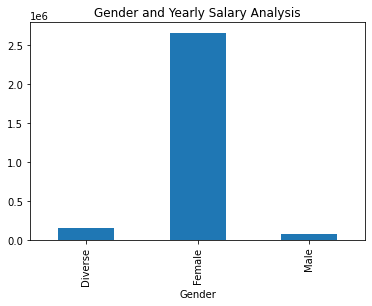

In [70]:
#Average Salary for Gender
df.groupby("Gender").mean()["Yearly_salary"].plot(kind='bar')
plt.title("Gender and Yearly Salary Analysis")
plt.show()

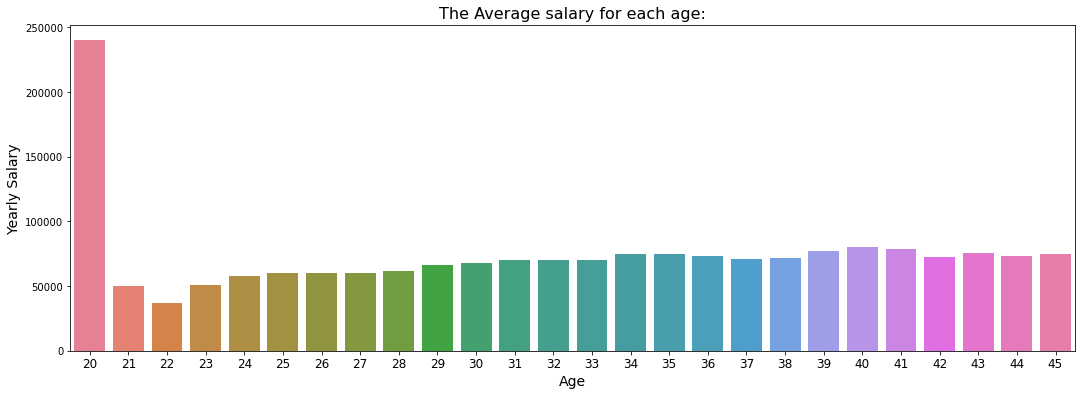

In [71]:
# Average salary for age
age_salary = age.groupby('Age', as_index = False).median()
plt.figure(figsize=(18, 6))
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly_salary',palette= 'husl')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

In [73]:
# Gender and Age analysis
occup = pd.DataFrame(df.groupby("Gender").mean()["Age"])
occup

,Age
Gender,
Diverse,27.500000
Female,31.098958
Male,32.147760


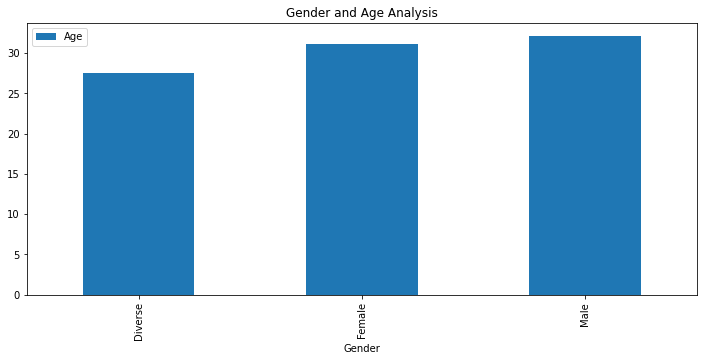

In [74]:
occup.plot(kind='bar',figsize=(12,5))
plt.title("Gender and Age Analysis")
plt.show()

In [77]:
# City and Age analysis
occup1 = pd.DataFrame(df.groupby("City").mean()["Age"])
occup1

,Age
City,
Aachen,30.5
Amsterdam,30.0
Ansbach,30.0
Barcelona,29.5
Basel,29.0
...,...
Wroclaw,42.0
Würzburg,28.0
Zurich,34.2


In [78]:
#Correlation
df.corr()

,Age,Years_of_experience,Yearly_salary,Annual_salary_year_ago,Vacation_Days,shorter_working_week_hrs
Age,1.000000,0.376016,0.117141,-0.017596,0.081490,-0.013013
Years_of_experience,0.376016,1.000000,0.016473,-0.049856,-0.032193,-0.009356
Yearly_salary,0.117141,0.016473,1.000000,0.999998,0.095389,-0.044144
Annual_salary_year_ago,-0.017596,-0.049856,0.999998,1.000000,0.372757,-0.050298
Vacation_Days,0.081490,-0.032193,0.095389,0.372757,1.000000,0.008761
shorter_working_week_hrs,-0.013013,-0.009356,-0.044144,-0.050298,0.008761,1.000000


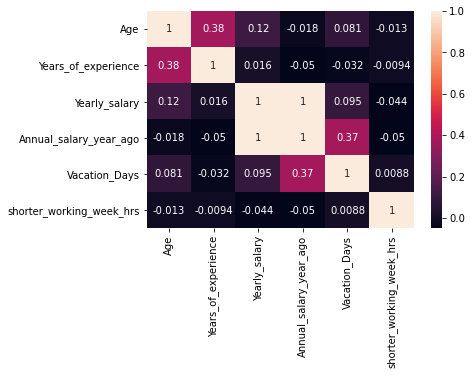

In [79]:
#Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

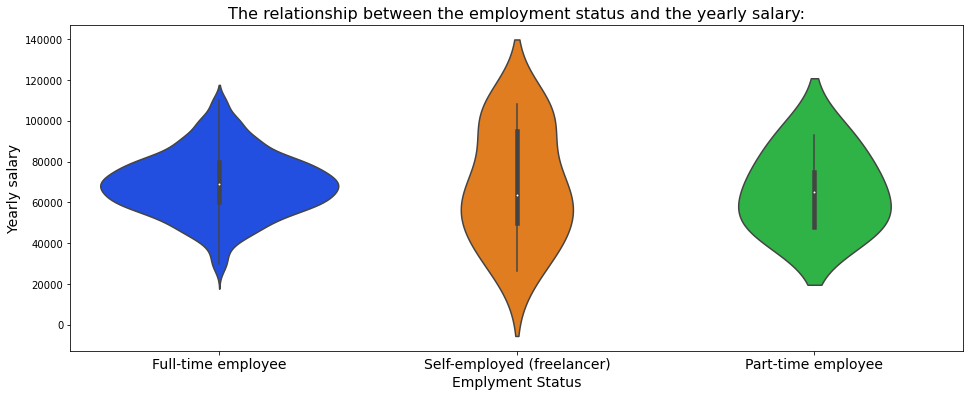

In [80]:
# the relationship between the employment status and the yearly salary:

plt.figure(figsize = (16, 6))
sns.violinplot(data = status, x= 'Employment_status', y= 'Yearly_salary', palette = 'bright')
plt.title('The relationship between the employment status and the yearly salary:', fontsize = 16)
plt.xlabel('Emplyment Status',fontsize=14)
plt.ylabel('Yearly salary', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Gender'>

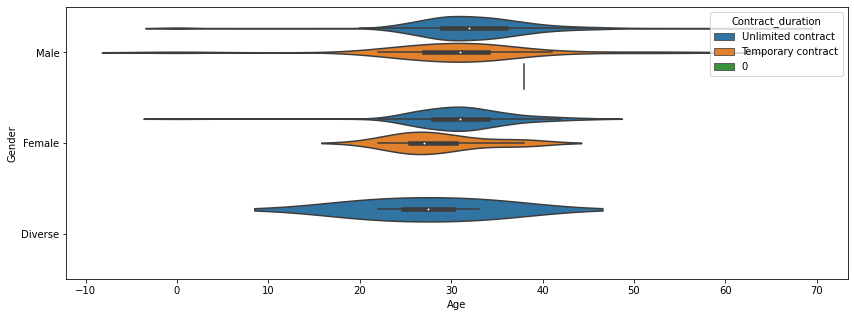

In [81]:
## Violinplot
plt.figure(figsize = (14, 5))
sns.violinplot(x="Age", 
               y="Gender",
               hue="Сontract_duration",
               data=df)

<AxesSubplot:xlabel='Seniority_level', ylabel='Years_of_experience'>

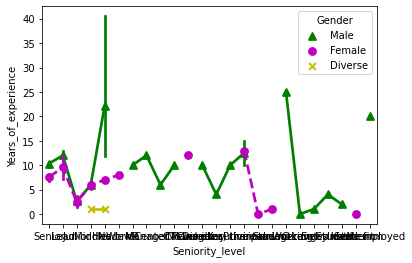

In [82]:
## Point Plot
sns.pointplot(x="Seniority_level", 
              y="Years_of_experience", 
              hue="Gender", 
              data=df, 
              palette={"Male":"g",
                       "Female":"m",
                      "Diverse":"y"},
              markers=["^","o","x"],
              linestyles=["-","--","-."])